### problem statement

As a lending institution, evaluating an applicant's ability to repay a loan is crucial for making informed lending decisions. 
To predict an applicant's loan repayment capacity,
we analyze various data sets which provided

i.application_train.csv
  This is the primary dataset which inculded the TARGET i.e,whether loan defaulted or not 
  
ii.bureau.csv
   typically contains information about the credit history of applicants,
   it gives information about how the applicant behave with the institution and also with other institutions.
         key-features noticed in the bureau dataset
   
          SK_ID_CURR            : Unique identifier for the applicant, 
                                  This will provide link between the bureau data to the  primary dataset 
          DAYS_CREDIT           : Number of days since the loan was granted.
          CREDIT_DAY_OVERDUE    : Number of days overdue for the credit.
          DAYS_CREDIT_ENDDATE   : Number of days since the loan ended.
          DAYS_CREDIT_UPDATE    : Number of days since the last update on the credit.
          CREDIT_TYPE           : Type of credit 
          AMT_CREDIT_MAX_OVERDUE: Maximum amount overdue on the credit.
          AMT_CREDIT_SUM        : Total amount of credit.
          AMT_CREDIT_SUM_DEBT   : Total amount of debt on the credit.
          AMT_CREDIT_SUM_LIMIT  : Credit limit on the credit.
          AMT_CREDIT_SUM_OVERDUE: Amount overdue on the credit.
          CNT_CREDIT_PROLONG    : Count of times the credit has been prolonged.
          STATUS                : Status of the credit in different months 
                                  (e.g., 0: no DPD, 1: DPD 1-30, 2: DPD 31-60, etc.).
                                  
   - can gain a comprehensive understanding of an applicant's credit history  
     which is essential for assessing their loan repayment capacity.                           
                                  
   
iii.bureau_balance.csv
       - provides detailed information about the monthly payment status of credit accounts.
       - This dataset is linked to the bureau.csv dataset through the SK_ID_BUREAU field, which uniquely 
         identifies each credit account record.
         
          SK_ID_BUREAU  : Unique identifier for each credit account record, linking to the bureau.csv dataset.
          MONTHS_BALANCE: Month of the record, relative to the end of the credit account’s history 
                          (e.g., -1 for the most recent month, -2 for the month before).
          STATUS        : Payment status of the credit account for that month, 
          
   -  can gain a comprehensive understanding of an applicant's repayment patterns, 
      which is essential for assessing their loan repayment capacity.

iv.installments_payments.csv
      - provides detailed information about the payments made towards installments of loan
      - link application_train.csv dataset through the SK_ID_CURR field
      
         SK_ID_CURR           : Unique identifier for the loan application, linking to the application_train.csv dataset.
         SK_ID_PREV           : Unique identifier for the previous loan, linking to the previous_application.csv dataset.
         NUM_INSTALMENT_NUMBER: The installment number for which the payment record is provided.
         DAYS_INSTALMENT      : The day on which the installment payment was due.
         DAYS_ENTRY_PAYMENT   : The day on which the installment payment was actually made.
         AMT_INSTALMENT       : The amount of the installment due.
         AMT_PAYMENT          : The amount actually paid towards the installment.

-    can get a comprehensive view of the applicant’s payment history and behavior, 
     which is crucial for assessing their loan repayment ability.

v.credit_card_balance.csv
      - contains detailed information about the credit card accounts held by the applicants
      - It is related to the application_train.csv dataset through the SK_ID_CURR field, 
        which links credit card details to the corresponding loan application.
        
        SK_ID_CURR     : Unique identifier for the loan application, linking to the application_train.csv dataset.
        SK_ID_BUREAU   : Unique identifier for the credit card account, linking to the bureau.csv dataset.
        MONTHS_BALANCE: Month of the record, relative to the end of the credit card account’s history 
        (e.g., -1 for the  most recent month, -2 for the month before).
        AMT_BALANCE: The balance amount on the credit card at the end of the month.
        AMT_CREDIT_LIMIT_ACTUAL: The actual credit limit on the credit card for that month.
        AMT_DRAWINGS_ATM_CURRENT: The amount withdrawn from ATMs on the credit card during the month.
        AMT_DRAWINGS_CURRENT: The amount spent on the credit card (excluding ATM withdrawals) during the month.
        AMT_DRAWINGS_POS_CURRENT: The amount spent at points of sale using the credit card during the month.
        AMT_INST_MIN_REGULARITY: The minimum regular payment amount required for the credit card during the month.
        AMT_PAYMENT_CURRENT: The amount paid towards the credit card balance during the month.
       
      
-      When combined with the application_train.csv, bureau.csv, bureau_balance.csv, and other datasets,
       it offers a detailed picture of the applicant’s overall creditworthiness and financial behavior.

vi.previous_application.csv
    - dataset contains information about previous loan applications made by the applicants
    - It is related to the application_train.csv dataset through the SK_ID_CURR field,
      which links the current loan application to the history of previous applications.
      
      SK_ID_CURR: Unique identifier for the loan application in the application_train.csv dataset.
   
      SK_ID_PREV: Unique identifier for the previous loan application.
      
      NAME_CONTRACT_TYPE: Type of the previous loan contract
      (e.g., cash loan, revolving loan).
      
      CODE_REJECT_REASON: Code for the reason the previous application was rejected.
      
      NAME_TYPE_SUITE: Type of suite or group the applicant was in when applying 
      (e.g., single applicant, applicant with co-applicant).
      
      NAME_PRODUCT_TYPE: Type of product for which the previous loan was applied (e.g., car loan, mortgage).
      
      AMT_APPLICATION: Amount requested in the previous application.
      
      AMT_CREDIT: Credit amount granted in the previous application.
      
      AMT_DOWN_PAYMENT: Down payment made in the previous application.
      
      AMT_GOODS_PRICE: Price of the goods or services for which the previous loan was applied.
      
      NAME_CONTRACT_STATUS: Status of the previous loan contract (e.g. approved, rejected).
      
      DAYS_DECISION: Number of days from the application to the decision on the previous loan.
      
      DAYS_FIRST_DUE: Number of days from the application to the first due date.
      
      DAYS_LAST_DUE: Number of days from the application to the last due date.
      
      DAYS_LAST_DUE_1ST_VERSION: Number of days from the application to the first due date
            in the first version of the record.
            
      DAYS_TERMINATION: Number of days from the application to the termination of the previous loan.
      
      NFLAG_INSURED_ON_APPROVAL: Flag indicating whether the loan was insured upon approval  
  

vii.POS_CASH_balance 
      
      
      
      









#### import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',125)

#### Load primary dataset

In [2]:
Loan_app=pd.read_csv('application_train.csv')

#### Basic checks

In [3]:
print(Loan_app.shape)
print(Loan_app.info())

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [4]:
Loan_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
Loan_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
Loan_app.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
Loan_app.duplicated().value_counts()

False    307511
Name: count, dtype: int64

In [8]:
# no duplicates

#### Exploratory Data Analysis

In [ ]:
import sweetviz as sv
report=sv.analyze(Loan_app)
report.show_html('my_report.html')

#### Data Preprocessing

In [9]:
Loan_app_missing=Loan_app.isnull().sum()
Loan_app_missing=Loan_app_missing[Loan_app_missing>0]
Loan_app_missing

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

Drop features which has more than 40% missing percentage

In [10]:
missing_percentage=Loan_app.isnull().mean()*100

In [11]:
missing_cols=pd.DataFrame(missing_percentage.round(2),columns=['missing_percentage'])

In [12]:
missing_cols.sort_values(by='missing_percentage', ascending=False)

,missing_percentage
COMMONAREA_MEDI,69.87
COMMONAREA_AVG,69.87
COMMONAREA_MODE,69.87
NONLIVINGAPARTMENTS_MODE,69.43
NONLIVINGAPARTMENTS_AVG,69.43
...,...
NAME_FAMILY_STATUS,0.00
NAME_EDUCATION_TYPE,0.00
NAME_INCOME_TYPE,0.00
AMT_ANNUITY,0.00


In [13]:
missing_values_1=missing_percentage[missing_percentage>=40].index.tolist()

In [14]:
train_app_clean=Loan_app.drop(columns=missing_values_1)

In [15]:
train_app_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0

In [16]:
train_app_clean.drop(columns=[
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
    'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 
   'AMT_REQ_CREDIT_BUREAU_WEEK',
   'AMT_REQ_CREDIT_BUREAU_MON', 
   'AMT_REQ_CREDIT_BUREAU_QRT'
], inplace=True)

In [17]:
train_app_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,Managers,1.0,3,3,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0


In [18]:
numerical_cols=train_app_clean.select_dtypes(include=['int','float'])
numerical_cols

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,0,0,0,0,0,0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,0,0,0,0,0,0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,0,0,0,0,1,1,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,0,0,0,1,1,0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0


In [19]:
corr_matrix = numerical_cols.corr()

In [20]:
threshold = 0.80

In [21]:
highly_correlated_pairs = [(i, j) for i in corr_matrix.columns 
                           for j in corr_matrix.columns 
                           if i != j and abs(corr_matrix[i][j]) >threshold]
for pair in highly_correlated_pairs:
    print(pair)

('CNT_CHILDREN', 'CNT_FAM_MEMBERS')
('AMT_CREDIT', 'AMT_GOODS_PRICE')
('AMT_GOODS_PRICE', 'AMT_CREDIT')
('DAYS_EMPLOYED', 'FLAG_EMP_PHONE')
('FLAG_EMP_PHONE', 'DAYS_EMPLOYED')
('CNT_FAM_MEMBERS', 'CNT_CHILDREN')
('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY')
('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT')
('REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION')
('LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION')
('REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY')
('LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY')
('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE')
('DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE')
('OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE')
('DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE')


In [22]:
train_app_clean.drop(columns=['CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE','FLAG_EMP_PHONE','REGION_RATING_CLIENT_W_CITY',
'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'],inplace=True)

In [23]:
train_app_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,2,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,-1134.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,Core staff,1,0,0,0,School,0.622246,NaN,1.0,0.0,-828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,2,0,0,0,Government,0.555912,0.729567,0.0,0.0,-815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,-617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,Core staff,2,0,0,1,Religion,0.322738,NaN,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,0,1,0,0,Sales staff,1,0,0,0,Services,0.681632,NaN,0.0,0.0,-273.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,1,1,0,NaN,2,0,0,0,XNA,0.115992,NaN,0.0,0.0,0.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,0,1,0,1,Managers,3,0,0,1,School,0.535722,0.218859,6.0,0.0,-1909.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,0,1,0,0,Laborers,2,0,1,1,Business Entity Type 1,0.514163,0.661024,0.0,0.0,-322.0,0.0


In [24]:
train_app_clean.shape

(307511, 37)

In [25]:
train_app_clean.duplicated().value_counts()

False    307511
Name: count, dtype: int64

In [26]:
cat_col=train_app_clean.select_dtypes(include=['O'])
cat_col

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 1


In [27]:
train_app_clean['NAME_CONTRACT_TYPE']=train_app_clean['NAME_CONTRACT_TYPE'].str.replace('Cash loans','0')
train_app_clean['NAME_CONTRACT_TYPE']=train_app_clean['NAME_CONTRACT_TYPE'].str.replace('Revolving loans','1')
train_app_clean['NAME_CONTRACT_TYPE'].unique()

array(['0', '1'], dtype=object)

In [28]:
train_app_clean['CODE_GENDER']=train_app_clean['CODE_GENDER'].str.replace('M','0')
train_app_clean['CODE_GENDER']=train_app_clean['CODE_GENDER'].str.replace('F','1')
train_app_clean['CODE_GENDER']=train_app_clean['CODE_GENDER'].str.replace('XNA','2')
train_app_clean['CODE_GENDER'].unique()

array(['0', '1', '2'], dtype=object)

In [29]:
train_app_clean['FLAG_OWN_CAR']=train_app_clean['FLAG_OWN_CAR'].str.replace('Y','1')
train_app_clean['FLAG_OWN_CAR']=train_app_clean['FLAG_OWN_CAR'].str.replace('N','0')
train_app_clean['FLAG_OWN_CAR'].unique()

array(['0', '1'], dtype=object)

In [30]:
train_app_clean['FLAG_OWN_REALTY']=train_app_clean['FLAG_OWN_REALTY'].str.replace('Y','1')
train_app_clean['FLAG_OWN_REALTY']=train_app_clean['FLAG_OWN_REALTY'].str.replace('N','0')
train_app_clean['FLAG_OWN_REALTY'].unique()

array(['1', '0'], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_app_clean.OCCUPATION_TYPE=le.fit_transform(train_app_clean.OCCUPATION_TYPE)
train_app_clean.NAME_FAMILY_STATUS=le.fit_transform(train_app_clean.NAME_FAMILY_STATUS)
train_app_clean.NAME_HOUSING_TYPE=le.fit_transform(train_app_clean.NAME_HOUSING_TYPE)
train_app_clean.NAME_EDUCATION_TYPE=le.fit_transform(train_app_clean.NAME_EDUCATION_TYPE)
train_app_clean.NAME_INCOME_TYPE=le.fit_transform(train_app_clean.NAME_INCOME_TYPE)
train_app_clean.NAME_TYPE_SUITE=le.fit_transform(train_app_clean.NAME_TYPE_SUITE)

In [32]:
train_app_clean['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [33]:
train_app_clean['ORGANIZATION_TYPE'].nunique()

58

In [34]:
train_app_clean.drop(columns=['ORGANIZATION_TYPE'],inplace=True)

In [35]:
train_app_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0
1,100003,0,0,1,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,3,1,0,0,0,0.622246,NaN,1.0,0.0,-828.0,0.0
2,100004,0,1,0,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,8,2,0,0,0,0.555912,0.729567,0.0,0.0,-815.0,0.0
3,100006,0,0,1,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,8,2,0,0,0,0.650442,NaN,2.0,0.0,-617.0,NaN
4,100007,0,0,0,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,3,2,0,0,1,0.322738,NaN,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,0,157500.0,254700.0,27558.0,6,7,4,2,5,0.032561,-9327,-236,-8456.0,-1982,1,0,1,0,0,14,1,0,0,0,0.681632,NaN,0.0,0.0,-273.0,NaN
307507,456252,0,0,1,0,1,0,72000.0,269550.0,12001.5,6,3,4,5,1,0.025164,-20775,365243,-4388.0,-4090,1,0,1,1,0,18,2,0,0,0,0.115992,NaN,0.0,0.0,0.0,NaN
307508,456253,0,0,1,0,1,0,153000.0,677664.0,29979.0,6,7,1,2,1,0.005002,-14966,-7921,-6737.0,-5150,1,0,1,0,1,10,3,0,0,1,0.535722,0.218859,6.0,0.0,-1909.0,1.0
307509,456254,1,0,1,0,1,0,171000.0,370107.0,20205.0,6,1,4,1,1,0.005313,-11961,-4786,-2562.0,-931,1,0,1,0,0,8,2,0,1,1,0.514163,0.661024,0.0,0.0,-322.0,0.0


In [36]:
train_app_clean['OCCUPATION_TYPE'].unique()

array([ 8,  3,  0, 10, 18,  4, 14,  1,  2, 12, 11, 16,  6, 17,  9, 13, 15,
        7,  5])

In [37]:
train_app_clean.select_dtypes(include=[object])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,0,0,1
1,0,1,0,0
2,1,0,1,1
3,0,1,0,1
4,0,0,0,1
...,...,...,...,...
307506,0,0,0,0
307507,0,1,0,1
307508,0,1,0,1
307509,0,1,0,1


In [38]:
train_app_clean['NAME_CONTRACT_TYPE']=train_app_clean['NAME_CONTRACT_TYPE'].astype(float)
train_app_clean['CODE_GENDER']=train_app_clean['CODE_GENDER'].astype(float)
train_app_clean['FLAG_OWN_CAR']=train_app_clean['FLAG_OWN_CAR'].astype(float)
train_app_clean['FLAG_OWN_REALTY']=train_app_clean['FLAG_OWN_REALTY'].astype(float)

In [39]:
train_app_clean.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE            float64
CODE_GENDER                   float64
FLAG_OWN_CAR                  float64
FLAG_OWN_REALTY               float64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
NAME_TYPE_SUITE                 int32
NAME_INCOME_TYPE                int32
NAME_EDUCATION_TYPE             int32
NAME_FAMILY_STATUS              int32
NAME_HOUSING_TYPE               int32
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL                      int64
OCCUPATION_TYPE                 int32
REGION_RATIN

In [40]:
# Calculate the total number of missing values for each column
missing_counts = train_app_clean.isnull().sum()

# Filter columns where the count of missing values is greater than 0
missing_counts_gt_0 = missing_counts[missing_counts > 0]

#Display the result
print(missing_counts_gt_0)

AMT_ANNUITY                      12
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64


In [41]:
# Filter columns where the count of missing values is greater than 0
columns_with_missing = missing_counts_gt_0.index

# Display the mode,its frequency of each column with missing values
for col in columns_with_missing:
    print({col})
    print(train_app_clean[col].mode())
    print(train_app_clean[col].value_counts().iloc[0])
    print(train_app_clean[col].value_counts().iloc[0]/ len(train_app_clean) * 100)
    print("\n")

{'AMT_ANNUITY'}
0    9000.0
Name: AMT_ANNUITY, dtype: float64
6385
2.0763484883467584


{'EXT_SOURCE_2'}
0    0.285898
Name: EXT_SOURCE_2, dtype: float64
721
0.2344631574155071


{'EXT_SOURCE_3'}
0    0.7463
Name: EXT_SOURCE_3, dtype: float64
1460
0.4747797639759228


{'OBS_30_CNT_SOCIAL_CIRCLE'}
0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
163910
53.30215829677638


{'DEF_60_CNT_SOCIAL_CIRCLE'}
0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
280721
91.28811652266097


{'DAYS_LAST_PHONE_CHANGE'}
0    0.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
37672
12.250618677055455


{'AMT_REQ_CREDIT_BUREAU_YEAR'}
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
71801
23.349083447421393




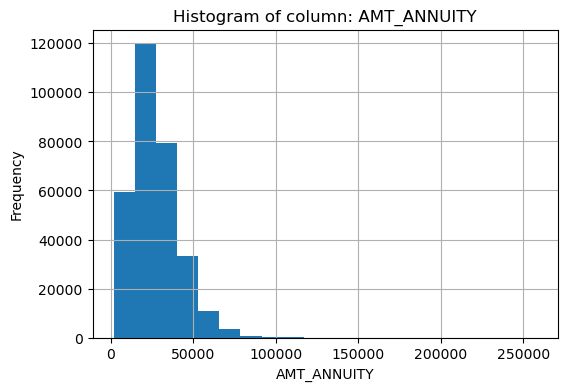

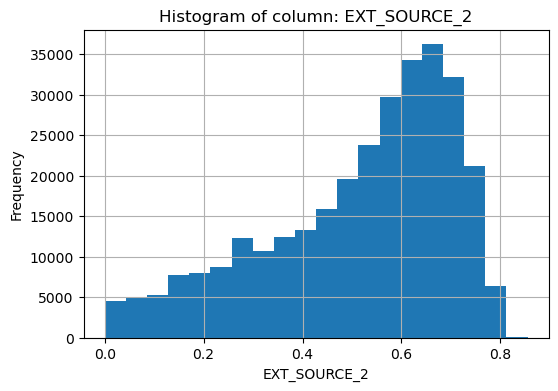

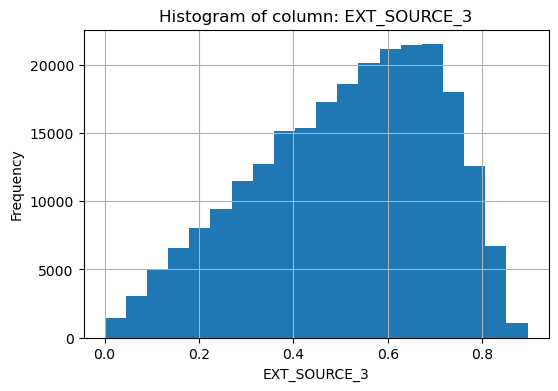

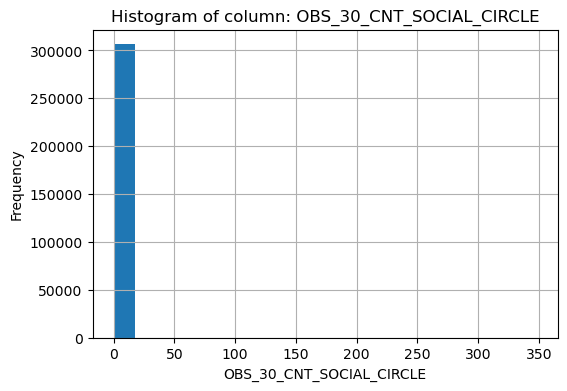

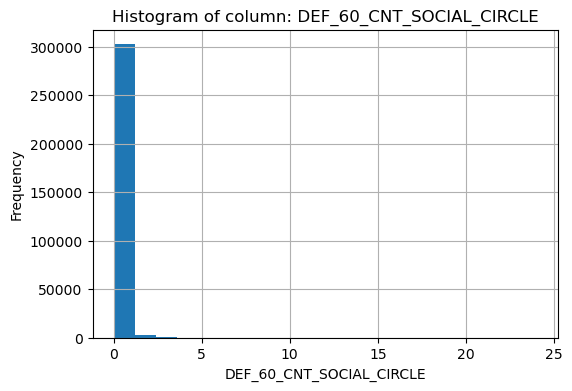

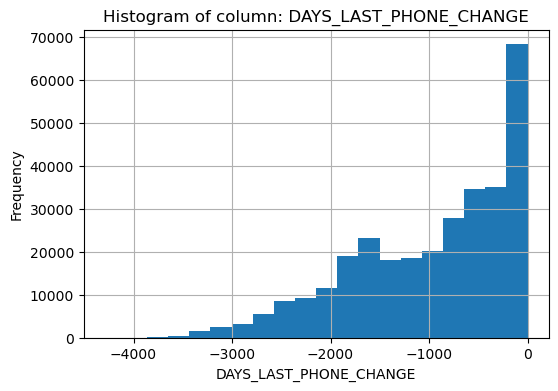

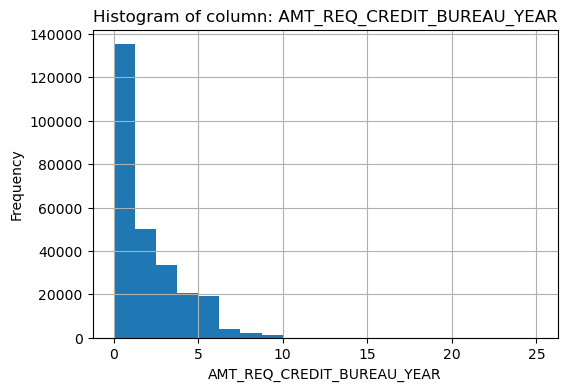

In [42]:
# Plot histograms for each numerical column with missing values
for col in columns_with_missing:
    if pd.api.types.is_numeric_dtype(train_app_clean[col]):
        plt.figure(figsize=(6,4))
        train_app_clean[col].hist(bins=20)
        plt.title(f"Histogram of column: {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

since mode represents more than 50% of the total frequency,Impute following missing values  with mode
    - OBS_30_CNT_SOCIAL_CIRCLE
    - DEF_60_CNT_SOCIAL_CIRCLE (same as OBS_30_CNT_SOCIAL_CIRCLE) and distribution is not normal distribution

In [43]:
train_app_clean['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(train_app_clean['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)

In [44]:
train_app_clean['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(train_app_clean['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)

In [45]:
train_app_clean['AMT_ANNUITY'].fillna(train_app_clean['AMT_ANNUITY'].median(),inplace=True)

In [46]:
train_app_clean['EXT_SOURCE_2'].fillna(train_app_clean['EXT_SOURCE_2'].median(),inplace=True)

In [47]:
train_app_clean['EXT_SOURCE_3'].fillna(train_app_clean['EXT_SOURCE_3'].median(),inplace=True)

In [48]:
train_app_clean['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(train_app_clean['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)

In [49]:
train_app_clean['DAYS_LAST_PHONE_CHANGE'].fillna(train_app_clean['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)

In [50]:
columns_with_missing.isnull().sum()

0

In [51]:
bureau=pd.read_csv('bureau.csv')

In [52]:
print(bureau.shape)

(1716428, 17)


Basic checks

In [53]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [54]:
missing_counts1=bureau.isnull().sum()
missing_counts1=missing_counts1[missing_counts1>0]
missing_counts1

DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_ANNUITY               1226791
dtype: int64

In [55]:
missing_percentage1=bureau.isnull().mean()*100

In [56]:
missing_percentage1=missing_percentage1[missing_percentage1>0]
missing_percentage1

DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_ANNUITY               71.473490
dtype: float64

In [57]:
bureau.drop(columns='AMT_ANNUITY',inplace=True )

In [58]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508


In [59]:
num_col=bureau.select_dtypes(include=[int,float])
num_col

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,-131
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,-20
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,-16
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,-16
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,-19
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,-2493
1716425,100044,5057762,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,-967
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,-1508


In [60]:
corr_matrix2=num_col.corr()

In [61]:
thresold1= 0.85

In [62]:
highly_correlated_pairs2 = [(i, j) for i in corr_matrix2.columns 
                           for j in corr_matrix2.columns 
                           if i != j and abs(corr_matrix2[i][j]) >thresold1]
for pair in highly_correlated_pairs2:
    print(pair)

('DAYS_CREDIT', 'DAYS_ENDDATE_FACT')
('DAYS_ENDDATE_FACT', 'DAYS_CREDIT')


In [63]:
correlation = corr_matrix2['DAYS_CREDIT'].corr(corr_matrix2['DAYS_ENDDATE_FACT'])

In [64]:
correlation 

0.984886607218582

In [65]:
bureau.drop(columns='DAYS_ENDDATE_FACT',inplace=True)

In [66]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508


In [67]:
cat_cols_b=bureau.select_dtypes(include='object')
cat_cols_b

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,Closed,currency 1,Consumer credit
1,Active,currency 1,Credit card
2,Active,currency 1,Consumer credit
3,Active,currency 1,Credit card
4,Active,currency 1,Consumer credit
...,...,...,...
1716423,Active,currency 1,Microloan
1716424,Closed,currency 1,Consumer credit
1716425,Closed,currency 1,Consumer credit
1716426,Closed,currency 1,Consumer credit


In [68]:
print(cat_cols_b['CREDIT_ACTIVE'].unique())
print('***************')
print(cat_cols_b['CREDIT_CURRENCY'].unique())
print('***************')
print(cat_cols_b['CREDIT_TYPE'].unique())

['Closed' 'Active' 'Sold' 'Bad debt']
***************
['currency 1' 'currency 2' 'currency 4' 'currency 3']
***************
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']


In [69]:
bureau['CREDIT_ACTIVE']=le.fit_transform(bureau['CREDIT_ACTIVE'])
bureau['CREDIT_CURRENCY']=le.fit_transform(bureau['CREDIT_CURRENCY'])
bureau['CREDIT_TYPE']=le.fit_transform(bureau['CREDIT_TYPE'])

In [70]:
print(bureau['CREDIT_ACTIVE'].unique())
print('*************')
print(bureau['CREDIT_CURRENCY'].unique())
print('*************')
print(bureau['CREDIT_TYPE'].unique())

[2 0 3 1]
*************
[0 1 3 2]
*************
[ 3  4 12  1 10  9  6 13 14  0  2  8 11  5  7]


In [71]:
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE               int32
CREDIT_CURRENCY             int32
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                 int32
DAYS_CREDIT_UPDATE          int64
dtype: object

In [72]:
missing_counts2=bureau.isnull().sum()
missing_counts2=missing_counts2[missing_counts2>0]
missing_counts2

DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
dtype: int64

In [73]:
# Filter columns where the count of missing values is greater than 0
columns_with_missing_bureau = missing_counts2.index

# Display the mode,its frequency of each column with missing values
for col in columns_with_missing_bureau:
    print({col})
    print(bureau[col].mode())
    print(bureau[col].value_counts().iloc[0])
    print(bureau[col].value_counts().iloc[0]/ len(bureau) * 100)
    print("\n")

{'DAYS_CREDIT_ENDDATE'}
0    0.0
Name: DAYS_CREDIT_ENDDATE, dtype: float64
883
0.051444045424567764


{'AMT_CREDIT_MAX_OVERDUE'}
0    0.0
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64
470650
27.42031707709266


{'AMT_CREDIT_SUM'}
0    0.0
Name: AMT_CREDIT_SUM, dtype: float64
66582
3.879102415015369


{'AMT_CREDIT_SUM_DEBT'}
0    0.0
Name: AMT_CREDIT_SUM_DEBT, dtype: float64
1016434
59.21798059691405


{'AMT_CREDIT_SUM_LIMIT'}
0    0.0
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64
1050142
61.18182644422021




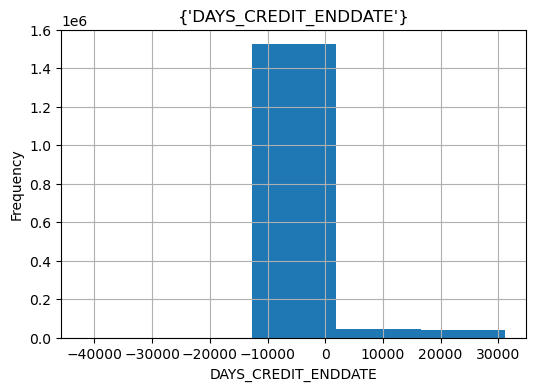

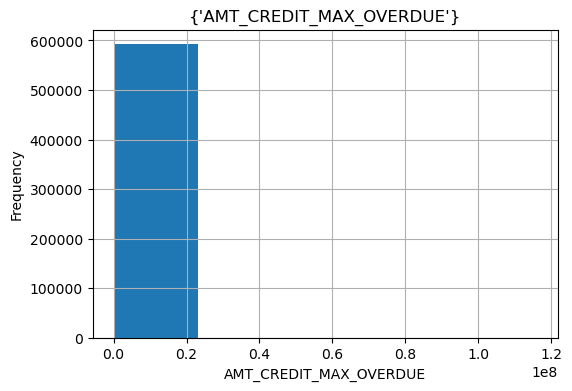

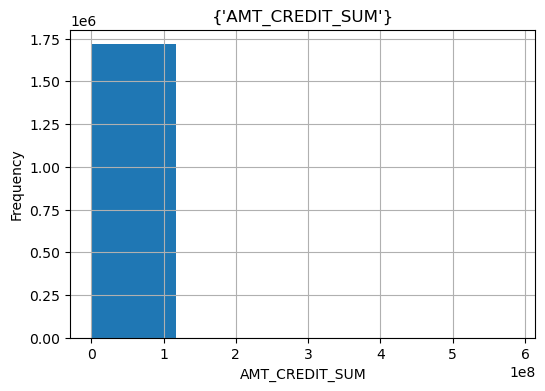

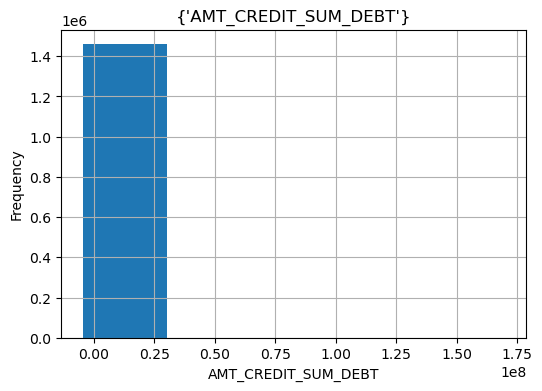

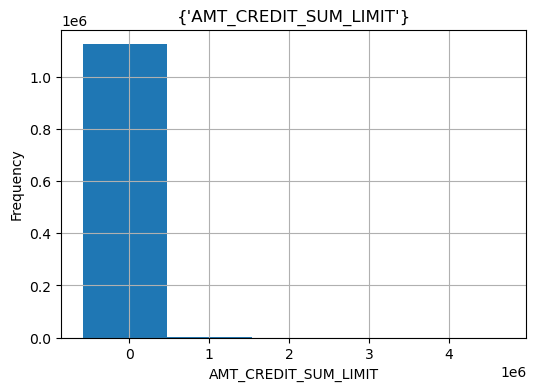

In [74]:
# Plot histograms for each numerical column with missing values
for col in columns_with_missing_bureau:
    if pd.api.types.is_numeric_dtype(bureau[col]):
        plt.figure(figsize=(6,4))
        bureau[col].hist(bins=5)
        plt.title( {col})
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [75]:
print(bureau['DAYS_CREDIT_ENDDATE'].mode())
print(bureau['DAYS_CREDIT_ENDDATE'].value_counts().iloc[0])
bureau['DAYS_CREDIT_ENDDATE'].value_counts().iloc[0] / len(bureau) * 100

0    0.0
Name: DAYS_CREDIT_ENDDATE, dtype: float64
883


0.051444045424567764

<function matplotlib.pyplot.show(close=None, block=None)>

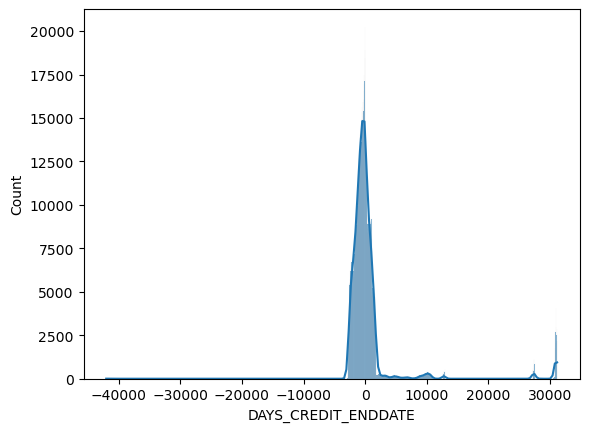

In [76]:
sns.histplot(data=bureau,x='DAYS_CREDIT_ENDDATE',kde=True)
plt.show

In [77]:
bureau['DAYS_CREDIT_ENDDATE'].median()

-330.0

In [78]:
bureau['DAYS_CREDIT_ENDDATE'].fillna(bureau['DAYS_CREDIT_ENDDATE'].mode()[0],inplace=True)

In [79]:
print(bureau['AMT_CREDIT_MAX_OVERDUE'].mode())
print(bureau['AMT_CREDIT_MAX_OVERDUE'].value_counts().iloc[0])
print(bureau['AMT_CREDIT_MAX_OVERDUE'].value_counts().iloc[0] / len(bureau) * 100)

0    0.0
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64
470650
27.42031707709266


In [80]:
bureau['AMT_CREDIT_MAX_OVERDUE'].median()

0.0

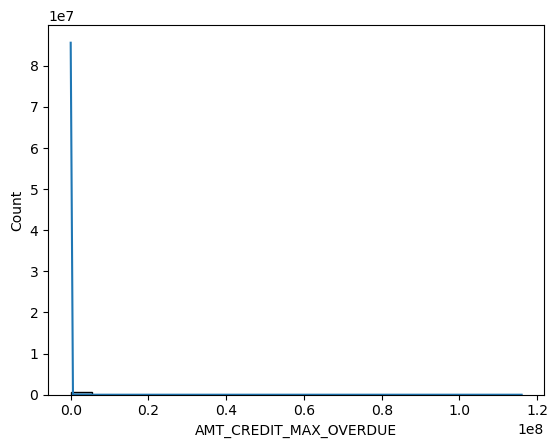

In [81]:
sns.histplot(x='AMT_CREDIT_MAX_OVERDUE',data=bureau,kde=True)
plt.show()

In [82]:
bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(bureau['AMT_CREDIT_MAX_OVERDUE'].mode()[0],inplace=True)
# median and mode both 0.0

In [83]:
bureau['AMT_CREDIT_SUM'].fillna(bureau['AMT_CREDIT_SUM'].mode()[0],inplace=True)

In [84]:
print(bureau['AMT_CREDIT_SUM_DEBT'].value_counts().iloc[0]/len(bureau)*100)
print('*********')
print(bureau['AMT_CREDIT_SUM_LIMIT'].value_counts().iloc[0]/len(bureau)*100)

59.21798059691405
*********
61.18182644422021


In [85]:
bureau['AMT_CREDIT_SUM_DEBT'].fillna(bureau['AMT_CREDIT_SUM_DEBT'].mode()[0],inplace=True)

In [86]:
bureau['AMT_CREDIT_SUM_LIMIT'].fillna(bureau['AMT_CREDIT_SUM_LIMIT'].mode()[0],inplace=True)

In [87]:
bureau.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64

In [88]:
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE               int32
CREDIT_CURRENCY             int32
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                 int32
DAYS_CREDIT_UPDATE          int64
dtype: object

******************************************************************

Load the bureau_balance dataset

In [89]:
bureau_balance=pd.read_csv('bureau_balance.csv')

Basic checks

In [90]:
print(bureau_balance.shape)

(27299925, 3)


In [91]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [92]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [93]:
bureau_balance.duplicated().nunique()

1

In [94]:
average_balance = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].mean().reset_index()

In [95]:
print("Average Balance per Loan:")
print(average_balance)

Average Balance per Loan:
        SK_ID_BUREAU  MONTHS_BALANCE
0            5001709           -48.0
1            5001710           -41.0
2            5001711            -1.5
3            5001712            -9.0
4            5001713           -10.5
...              ...             ...
817390       6842884           -23.5
817391       6842885           -11.5
817392       6842886           -16.0
817393       6842887           -18.0
817394       6842888           -30.5

[817395 rows x 2 columns]


In [96]:
max_balance = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max().reset_index()
max_balance.rename(columns={'MONTHS_BALANCE': 'max_balance'}, inplace=True)
print("Maximum Balance per Loan:")
print(max_balance)

Maximum Balance per Loan:
        SK_ID_BUREAU  max_balance
0            5001709            0
1            5001710            0
2            5001711            0
3            5001712            0
4            5001713            0
...              ...          ...
817390       6842884            0
817391       6842885            0
817392       6842886            0
817393       6842887            0
817394       6842888            0

[817395 rows x 2 columns]


In [97]:
min_balance = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].min().reset_index()
min_balance.rename(columns={'MONTHS_BALANCE': 'min_balance'}, inplace=True)
print("Minimum Balance per Loan:")
print(min_balance)

Minimum Balance per Loan:
        SK_ID_BUREAU  min_balance
0            5001709          -96
1            5001710          -82
2            5001711           -3
3            5001712          -18
4            5001713          -21
...              ...          ...
817390       6842884          -47
817391       6842885          -23
817392       6842886          -32
817393       6842887          -36
817394       6842888          -61

[817395 rows x 2 columns]


In [98]:
num_records = bureau_balance.groupby('SK_ID_BUREAU').size().reset_index(name='num_records')
# size() function used to counts the number of rows in each group.
# Essentially, it tells how many times each SK_ID_BUREAU appears in the bureau_balance DataFrame.
print("Number of Balance Records per Loan:")
print(num_records)

Number of Balance Records per Loan:
        SK_ID_BUREAU  num_records
0            5001709           97
1            5001710           83
2            5001711            4
3            5001712           19
4            5001713           22
...              ...          ...
817390       6842884           48
817391       6842885           24
817392       6842886           33
817393       6842887           37
817394       6842888           62

[817395 rows x 2 columns]


In [99]:
common_columns = set(bureau.columns) & set(bureau_balance.columns)
common_columns

{'SK_ID_BUREAU'}

In [100]:
merged_data = bureau.merge(average_balance, on='SK_ID_BUREAU', how='left')
merged_data = merged_data.merge(max_balance, on='SK_ID_BUREAU', how='left')
merged_data = merged_data.merge(min_balance, on='SK_ID_BUREAU', how='left')
merged_data = merged_data.merge(num_records, on='SK_ID_BUREAU', how='left')

In [101]:
print(type(bureau))
print(type(average_balance))
print(type(max_balance))
print(type(min_balance))
print(type(num_records))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [102]:
merged_data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,max_balance,min_balance,num_records
0,215354,5714462,2,0,-497,0,-153.0,0.0,0,91323.00,0.0,0.0,0.0,3,-131,NaN,NaN,NaN,NaN
1,215354,5714463,0,0,-208,0,1075.0,0.0,0,225000.00,171342.0,0.0,0.0,4,-20,NaN,NaN,NaN,NaN
2,215354,5714464,0,0,-203,0,528.0,0.0,0,464323.50,0.0,0.0,0.0,3,-16,NaN,NaN,NaN,NaN
3,215354,5714465,0,0,-203,0,0.0,0.0,0,90000.00,0.0,0.0,0.0,4,-16,NaN,NaN,NaN,NaN
4,215354,5714466,0,0,-629,0,1197.0,77674.5,0,2700000.00,0.0,0.0,0.0,3,-21,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,0,0,-44,0,-30.0,0.0,0,11250.00,11250.0,0.0,0.0,10,-19,NaN,NaN,NaN,NaN
1716424,100044,5057754,2,0,-2648,0,-2433.0,5476.5,0,38130.84,0.0,0.0,0.0,3,-2493,NaN,NaN,NaN,NaN
1716425,100044,5057762,2,0,-1809,0,-1628.0,0.0,0,15570.00,0.0,0.0,0.0,3,-967,NaN,NaN,NaN,NaN
1716426,246829,5057770,2,0,-1878,0,-1513.0,0.0,0,36000.00,0.0,0.0,0.0,3,-1508,NaN,NaN,NaN,NaN


In [103]:
merged_data.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE            0
AMT_CREDIT_MAX_OVERDUE         0
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 0
AMT_CREDIT_SUM_DEBT            0
AMT_CREDIT_SUM_LIMIT           0
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
MONTHS_BALANCE            942074
max_balance               942074
min_balance               942074
num_records               942074
dtype: int64

In [104]:
merged_data.shape

(1716428, 19)

In [105]:
installments_payments=pd.read_csv('installments_payments.csv')

In [106]:
print(installments_payments.shape)
print('************')
print(installments_payments.columns)
print('************')
print(installments_payments.dtypes)

(13605401, 8)
************
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')
************
SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object


In [107]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [108]:
# Check for missing values
missing_values_installments = installments_payments.isnull().sum()
print(missing_values_installments>0)

SK_ID_PREV                False
SK_ID_CURR                False
NUM_INSTALMENT_VERSION    False
NUM_INSTALMENT_NUMBER     False
DAYS_INSTALMENT           False
DAYS_ENTRY_PAYMENT         True
AMT_INSTALMENT            False
AMT_PAYMENT                True
dtype: bool


In [109]:
# Check for missing values
missing_values_installments = installments_payments.isnull().sum()
print(missing_values_installments[missing_values_installments>0])

DAYS_ENTRY_PAYMENT    2905
AMT_PAYMENT           2905
dtype: int64


In [110]:
#Fill missing values with 0 for numeric columns
installments_payments.fillna(0, inplace=True)

In [111]:
installments_payments.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [112]:
corr_mat=installments_payments.corr()

In [113]:
thresoldip=0.85

In [114]:
highly_correlated_pairs_ip = [(i, j) for i in corr_mat.columns 
                           for j in corr_mat.columns 
                           if i != j and abs(corr_mat[i][j]) >thresoldip]
for pair in highly_correlated_pairs_ip:
    print(pair)

('DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT')
('DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT')
('AMT_INSTALMENT', 'AMT_PAYMENT')
('AMT_PAYMENT', 'AMT_INSTALMENT')


In [115]:
corelation_ip=corr_mat['AMT_INSTALMENT'].corr(corr_mat['AMT_PAYMENT']) 


In [116]:
corelation_ip

0.9969323569263114

In [117]:
corelation_ip1=corr_mat['DAYS_ENTRY_PAYMENT'].corr(corr_mat['DAYS_INSTALMENT'])

In [118]:
corelation_ip1

0.9999903650039226

In [119]:
installments_payments_summary = installments_payments.groupby('SK_ID_CURR').agg({
    'AMT_PAYMENT': ['sum', 'mean', 'max', 'min'],
    'DAYS_INSTALMENT': 'count'
}).reset_index()


In [120]:
installments_payments_summary 

SK_ID_CURR  AMT_PAYMENT                                       \
                           sum          mean         max        min   
0          100001    41195.925   5885.132143   17397.900   3951.000   
1          100002   219625.695  11559.247105   53093.745   9251.775   
2          100003  1618864.650  64754.586000  560835.360   6662.970   
3          100004    21288.465   7096.155000   10573.965   5357.250   
4          100005    56161.845   6240.205000   17656.245   4813.200   
...           ...          ...           ...         ...        ...   
339582     456251    52450.470   7492.924286   12815.010   6605.910   
339583     456252    60419.205  10069.867500   10074.465  10046.880   
339584     456253    57622.815   4115.915357    5575.185     27.270   
339585     456254   194556.825  10239.832895   19065.825   2296.440   
339586     456255  3525819.975  47646.215878  669251.655     34.965   

       DAYS_INSTALMENT  
                 count  
0                    7  
1                   19  
2                   25  
3                    3  
4                    9  
...                ...  
339582               7  
339583               6  
339584              14  
339585              19  
339586              74  

[339587 rows x 6 columns]

In [121]:
# Flatten MultiIndex columns
installments_payments_summary.columns = ['_'.join(col).strip() for col in installments_payments_summary .columns.values]

In [122]:
installments_payments_summary .columns

Index(['SK_ID_CURR_', 'AMT_PAYMENT_sum', 'AMT_PAYMENT_mean', 'AMT_PAYMENT_max',
       'AMT_PAYMENT_min', 'DAYS_INSTALMENT_count'],
      dtype='object')

In [123]:
installments_payments_summary .dtypes

SK_ID_CURR_                int64
AMT_PAYMENT_sum          float64
AMT_PAYMENT_mean         float64
AMT_PAYMENT_max          float64
AMT_PAYMENT_min          float64
DAYS_INSTALMENT_count      int64
dtype: object

In [124]:
installments_payments_summary = installments_payments_summary.rename(columns={'SK_ID_CURR_':'SK_ID_CURR'})

In [125]:
primary_with_IP=train_app_clean.merge(installments_payments_summary,on='SK_ID_CURR', how='left')

In [126]:
primary_with_IP.shape

(307511, 41)

In [127]:
credit_card_balance=pd.read_csv('credit_card_balance.csv')

In [128]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.00,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.00,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.00,2250.000,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.00,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.00,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,1879.11,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,375750.00,356994.675,269356.140,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [129]:
print(credit_card_balance.shape)
print(credit_card_balance.columns)

(3840312, 23)
Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


In [130]:
cc_numeric=credit_card_balance.select_dtypes(include=[int,float])

In [131]:
cc_numeric

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.00,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.00,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.00,2250.000,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.00,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.00,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,1879.11,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,23.0,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,375750.00,356994.675,269356.140,273093.975,273093.975,2.0,2,0.0,0.0,18.0,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,0,0


In [132]:
thresold2=0.85

In [133]:
cc_numeric_corr=cc_numeric.corr()
cc_numeric_cor=cc_numeric_corr[cc_numeric_corr.abs()>thresold2]

# Remove NaN values resulting from the filtering
cc_numeric_cor = cc_numeric_cor.stack().reset_index()

#Remove NaN Values: cc_numeric_cor will have NaN where the correlation did not meet the threshold.
#Use .stack() to remove NaN values and reshape the DataFrame into a long format where each row is a feature pair
# with its correlation value.

cc_numeric_cor.columns = ['Feature1', 'Feature2', 'Correlation']

#Remove pairs where a feature is correlated with itself, if such rows are present.

cc_numeric_cor = cc_numeric_cor[cc_numeric_cor['Feature1'] != cc_numeric_cor['Feature2']]

In [134]:
cc_numeric_cor 

,Feature1,Feature2,Correlation
4,AMT_BALANCE,AMT_INST_MIN_REGULARITY,0.896728
5,AMT_BALANCE,AMT_RECEIVABLE_PRINCIPAL,0.999720
6,AMT_BALANCE,AMT_RECIVABLE,0.999917
7,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,0.999897
13,AMT_INST_MIN_REGULARITY,AMT_BALANCE,0.896728
15,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,0.896030
16,AMT_INST_MIN_REGULARITY,AMT_RECIVABLE,0.897617
17,AMT_INST_MIN_REGULARITY,AMT_TOTAL_RECEIVABLE,0.897587
19,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,0.994764
20,AMT_PAYMENT_TOTAL_CURRENT,AMT_PAYMENT_CURRENT,0.994764


In [135]:
cc_numeric_cor  = pd.DataFrame(cc_numeric_cor )

# Create a set to track features that need to be dropped
features_to_drop = set()

# Iterate over each pair of features
for _, row in cc_numeric_cor.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    correlation = row['Correlation']
    
    if correlation > 0.85:  # Adjust this threshold if needed
        # Drop the second feature in each pair
        features_to_drop.add(feature2)

print("Features to drop:", features_to_drop)

Features to drop: {'AMT_PAYMENT_CURRENT', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_BALANCE'}


credit_card_balance_cleaned

In [136]:
# Check for duplicates
duplicates = credit_card_balance.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 0


In [137]:
# Aggregate features by ID
credit_card_balance_summary = credit_card_balance.groupby('SK_ID_CURR').agg({'AMT_BALANCE':['sum', 'mean', 'max', 'min'],
                              'MONTHS_BALANCE':['sum', 'mean', 'max', 'min']})
credit_card_balance_summary.rename(columns={'sum': 'total_balance', 'mean': 'average_balance', 'max': 'max_balance', 'min': 'min_balance'}, inplace=True)

In [138]:
credit_card_balance_summary

AMT_BALANCE                                          \
           total_balance average_balance max_balance min_balance   
SK_ID_CURR                                                         
100006             0.000        0.000000       0.000       0.000   
100011       4031676.225    54482.111149  189000.000       0.000   
100013       1743352.245    18159.919219  161420.220       0.000   
100021             0.000        0.000000       0.000       0.000   
100023             0.000        0.000000       0.000       0.000   
...                  ...             ...         ...         ...   
456244       5405223.960   131834.730732  453627.675       0.000   
456246        105093.855    13136.731875   43490.115       0.000   
456247       2205557.640    23216.396211  190202.130       0.000   
456248             0.000        0.000000       0.000       0.000   
456250       2083071.915   173589.326250  200208.915  153832.725   

           MONTHS_BALANCE                                          
            total_balance average_balance max_balance min_balance  
SK_ID_CURR                                                         
100006                -21            -3.5          -1          -6  
100011              -2849           -38.5          -2         -75  
100013              -4656           -48.5          -1         -96  
100021               -170           -10.0          -2         -18  
100023                -60            -7.5          -4         -11  
...                   ...             ...         ...         ...  
456244               -861           -21.0          -1         -41  
456246                -44            -5.5          -2          -9  
456247              -4655           -49.0          -2         -96  
456248               -299           -13.0          -2         -24  
456250                -78            -6.5          -1         -12  

[103558 rows x 8 columns]

In [139]:
print(primary_with_IP.index)
print(credit_card_balance_summary.index)

RangeIndex(start=0, stop=307511, step=1)
Index([100006, 100011, 100013, 100021, 100023, 100028, 100036, 100042, 100043,
       100047,
       ...
       456236, 456237, 456239, 456241, 456242, 456244, 456246, 456247, 456248,
       456250],
      dtype='int64', name='SK_ID_CURR', length=103558)


In [140]:
print(primary_with_IP.columns)
print(credit_card_balance_summary.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_PAYMENT_sum', 'AMT_PAYMENT_mean', 'AMT_PAYMENT_max',
       'AMT_PAYMENT_min', 'DAYS_INSTALMENT_count'],
      dtype='object')
MultiIndex([(   'AMT_BALANCE',   'total_balance'),
            (   

In [141]:
# Flatten the MultiIndex by joining the levels with an underscore
credit_card_balance_summary.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in credit_card_balance_summary.columns]


In [142]:
# Display the flattened columns
print(credit_card_balance_summary.columns)

Index(['AMT_BALANCE_total_balance', 'AMT_BALANCE_average_balance',
       'AMT_BALANCE_max_balance', 'AMT_BALANCE_min_balance',
       'MONTHS_BALANCE_total_balance', 'MONTHS_BALANCE_average_balance',
       'MONTHS_BALANCE_max_balance', 'MONTHS_BALANCE_min_balance'],
      dtype='object')


In [143]:
credit_card_balance_summary.rename(columns={'SK_ID_CURR_':'SK_ID_CURR'},inplace=True)

In [144]:
primary_with_IP_cc=primary_with_IP.merge(credit_card_balance_summary,on='SK_ID_CURR', how='left')

In [145]:
primary_with_IP_cc

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_PAYMENT_sum,AMT_PAYMENT_mean,AMT_PAYMENT_max,AMT_PAYMENT_min,DAYS_INSTALMENT_count,AMT_BALANCE_total_balance,AMT_BALANCE_average_balance,AMT_BALANCE_max_balance,AMT_BALANCE_min_balance,MONTHS_BALANCE_total_balance,MONTHS_BALANCE_average_balance,MONTHS_BALANCE_max_balance,MONTHS_BALANCE_min_balance
0,100002,1,0.0,0.0,0.0,1.0,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,219625.695,11559.247105,53093.745,9251.775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,0.0,1.0,0.0,0.0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,3,1,0,0,0,0.622246,0.535276,1.0,0.0,-828.0,0.0,1618864.650,64754.586000,560835.360,6662.970,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1.0,0.0,1.0,1.0,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,8,2,0,0,0,0.555912,0.729567,0.0,0.0,-815.0,0.0,21288.465,7096.155000,10573.965,5357.250,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0.0,1.0,0.0,1.0,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,8,2,0,0,0,0.650442,0.535276,2.0,0.0,-617.0,1.0,1007153.415,62947.088438,691786.890,2482.920,16.0,0.0,0.0,0.0,0.0,-21.0,-3.5,-1.0,-6.0
4,100007,0,0.0,0.0,0.0,1.0,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,3,2,0,0,1,0.322738,0.535276,0.0,0.0,-1106.0,0.0,806127.975,12214.060227,22678.785,0.180,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.0,0.0,0.0,0.0,0,157500.0,254700.0,27558.0,6,7,4,2,5,0.032561,-9327,-236,-8456.0,-1982,1,0,1,0,0,14,1,0,0,0,0.681632,0.535276,0.0,0.0,-273.0,1.0,52450.470,7492.924286,12815.010,6605.910,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0.0,1.0,0.0,1.0,0,72000.0,269550.0,12001.5,6,3,4,5,1,0.025164,-20775,365243,-4388.0,-4090,1,0,1,1,0,18,2,0,0,0,0.115992,0.535276,0.0,0.0,0.0,1.0,60419.205,10069.867500,10074.465,10046.880,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0.0,1.0,0.0,1.0,0,153000.0,677664.0,29979.0,6,7,1,2,1,0.005002,-14966,-7921,-6737.0,-5150,1,0,1,0,1,10,3,0,0,1,0.535722,0.218859,6.0,0.0,-1909.0,1.0,57622.815,4115.915357,5575.185,27.270,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,1,0.0,1.0,0.0,1.0,0,171000.0,370107.0,20205.0,6,1,4,1,1,0.005313,-11961,-4786,-2562.0,-931,1,0,1,0,0,8,2,0,1,1,0.514163,0.661024,0.0,0.0,-322.0,0.0,194556.825,10239.832895,19065.825,2296.440,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
previous_application=pd.read_csv('previous_application.csv')

In [147]:
print(previous_application.shape)
print(previous_application.columns)

(1670214, 37)
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [148]:
# Check for missing values
print(previous_application.isnull().sum())

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [149]:
prev_app=previous_application.select_dtypes(include=[int,float])

In [150]:
thresold3=0.90

In [151]:
prev_app_corr=prev_app.corr()
prev_app_corr=prev_app_corr[prev_app_corr.abs()>thresold3]

# Remove NaN values resulting from the filtering
prev_app_corr = prev_app_corr.stack().reset_index()

#Remove NaN Values: cc_numeric_cor will have NaN where the correlation did not meet the threshold.
#Use .stack() to remove NaN values and reshape the DataFrame into a long format where each row is a feature pair
# with its correlation value.

prev_app_corr.columns = ['Feature1', 'Feature2', 'Correlation']

#Remove pairs where a feature is correlated with itself, if such rows are present.

prev_app_corr = prev_app_corr[prev_app_corr['Feature1'] != prev_app_corr['Feature2']]

In [152]:
prev_app_corr

,Feature1,Feature2,Correlation
4,AMT_APPLICATION,AMT_CREDIT,0.975824
5,AMT_APPLICATION,AMT_GOODS_PRICE,0.999884
6,AMT_CREDIT,AMT_APPLICATION,0.975824
8,AMT_CREDIT,AMT_GOODS_PRICE,0.993087
10,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884
11,AMT_GOODS_PRICE,AMT_CREDIT,0.993087
25,DAYS_LAST_DUE,DAYS_TERMINATION,0.927990
26,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990


In [153]:
prev_app_corr_todrop=['AMT_CREDIT','AMT_GOODS_PRICE','DAYS_TERMINATION']

In [154]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [155]:
prev_app_summary = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'sum'],
    'NAME_CONTRACT_TYPE': 'count',
    # Add other relevant aggregations
}).reset_index()

prev_app_summary.columns = ['SK_ID_CURR', 'AVG_AMT_APPLICATION', 'SUM_AMT_APPLICATION', 'COUNT_CONTRACT_TYPE']

In [156]:
prev_app_summary

,SK_ID_CURR,AVG_AMT_APPLICATION,SUM_AMT_APPLICATION,COUNT_CONTRACT_TYPE
0,100001,24835.500,24835.5,1
1,100002,179055.000,179055.0,1
2,100003,435436.500,1306309.5,3
3,100004,24282.000,24282.0,1
4,100005,22308.750,44617.5,2
...,...,...,...,...
338852,456251,40455.000,40455.0,1
338853,456252,57595.500,57595.5,1
338854,456253,24162.750,48325.5,2
338855,456254,121317.750,242635.5,2


In [157]:
prev_app_summary.isnull().sum()

SK_ID_CURR             0
AVG_AMT_APPLICATION    0
SUM_AMT_APPLICATION    0
COUNT_CONTRACT_TYPE    0
dtype: int64

In [158]:
primary_with_IP_cc_prev_app=primary_with_IP_cc.merge(prev_app_summary,on='SK_ID_CURR',how='left')

In [159]:
primary_with_IP_cc_prev_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_PAYMENT_sum,AMT_PAYMENT_mean,AMT_PAYMENT_max,AMT_PAYMENT_min,DAYS_INSTALMENT_count,AMT_BALANCE_total_balance,AMT_BALANCE_average_balance,AMT_BALANCE_max_balance,AMT_BALANCE_min_balance,MONTHS_BALANCE_total_balance,MONTHS_BALANCE_average_balance,MONTHS_BALANCE_max_balance,MONTHS_BALANCE_min_balance,AVG_AMT_APPLICATION,SUM_AMT_APPLICATION,COUNT_CONTRACT_TYPE
0,100002,1,0.0,0.0,0.0,1.0,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,219625.695,11559.247105,53093.745,9251.775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.000,179055.00,1.0
1,100003,0,0.0,1.0,0.0,0.0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,3,1,0,0,0,0.622246,0.535276,1.0,0.0,-828.0,0.0,1618864.650,64754.586000,560835.360,6662.970,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435436.500,1306309.50,3.0
2,100004,0,1.0,0.0,1.0,1.0,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,8,2,0,0,0,0.555912,0.729567,0.0,0.0,-815.0,0.0,21288.465,7096.155000,10573.965,5357.250,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24282.000,24282.00,1.0
3,100006,0,0.0,1.0,0.0,1.0,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,8,2,0,0,0,0.650442,0.535276,2.0,0.0,-617.0,1.0,1007153.415,62947.088438,691786.890,2482.920,16.0,0.0,0.0,0.0,0.0,-21.0,-3.5,-1.0,-6.0,272203.260,2449829.34,9.0
4,100007,0,0.0,0.0,0.0,1.0,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,3,2,0,0,1,0.322738,0.535276,0.0,0.0,-1106.0,0.0,806127.975,12214.060227,22678.785,0.180,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150530.250,903181.50,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.0,0.0,0.0,0.0,0,157500.0,254700.0,27558.0,6,7,4,2,5,0.032561,-9327,-236,-8456.0,-1982,1,0,1,0,0,14,1,0,0,0,0.681632,0.535276,0.0,0.0,-273.0,1.0,52450.470,7492.924286,12815.010,6605.910,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40455.000,40455.00,1.0
307507,456252,0,0.0,1.0,0.0,1.0,0,72000.0,269550.0,12001.5,6,3,4,5,1,0.025164,-20775,365243,-4388.0,-4090,1,0,1,1,0,18,2,0,0,0,0.115992,0.535276,0.0,0.0,0.0,1.0,60419.205,10069.867500,10074.465,10046.880,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57595.500,57595.50,1.0
307508,456253,0,0.0,1.0,0.0,1.0,0,153000.0,677664.0,29979.0,6,7,1,2,1,0.005002,-14966,-7921,-6737.0,-5150,1,0,1,0,1,10,3,0,0,1,0.535722,0.218859,6.0,0.0,-1909.0,1.0,57622.815,4115.915357,5575.185,27.270,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24162.750,48325.50,2.0
307509,456254,1,0.0,1.0,0.0,1.0,0,171000.0,370107.0,20205.0,6,1,4,1,1,0.005313,-11961,-4786,-2562.0,-931,1,0,1,0,0,8,2,0,1,1,0.514163,0.661024,0.0,0.0,-322.0,0.0,194556.825,10239.832895,19065.825,2296.440,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121317.750,242635.50,2.0


***************************************************************************************************

In [160]:
POS_CASH_balance=pd.read_csv('POS_CASH_balance.csv')

In [161]:
print(POS_CASH_balance.shape)
print(POS_CASH_balance.columns)

(10001358, 8)
Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


In [162]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [163]:
POS_CASH_balance.fillna(0, inplace=True)

In [164]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [165]:
pos_cash_summary = POS_CASH_balance.groupby('SK_ID_CURR').agg({
    'CNT_INSTALMENT': ['mean', 'sum'],
    'CNT_INSTALMENT_FUTURE': ['mean', 'sum'],
    'NAME_CONTRACT_STATUS': lambda x: (x == 'Completed').sum()
}).reset_index()

# Flatten the MultiIndex columns
pos_cash_summary.columns = ['SK_ID_CURR', 'CNT_INSTALMENT_mean', 'CNT_INSTALMENT_sum', 
                            'CNT_INSTALMENT_FUTURE_mean', 'CNT_INSTALMENT_FUTURE_sum',
                            'NAME_CONTRACT_STATUS_completed']

In [166]:
pos_cash_summary.columns

Index(['SK_ID_CURR', 'CNT_INSTALMENT_mean', 'CNT_INSTALMENT_sum',
       'CNT_INSTALMENT_FUTURE_mean', 'CNT_INSTALMENT_FUTURE_sum',
       'NAME_CONTRACT_STATUS_completed'],
      dtype='object')

In [167]:
pos_cash_summary

,SK_ID_CURR,CNT_INSTALMENT_mean,CNT_INSTALMENT_sum,CNT_INSTALMENT_FUTURE_mean,CNT_INSTALMENT_FUTURE_sum,NAME_CONTRACT_STATUS_completed
0,100001,4.000000,36.0,1.444444,13.0,2
1,100002,24.000000,456.0,15.000000,285.0,0
2,100003,10.107143,283.0,5.785714,162.0,2
3,100004,3.750000,15.0,2.250000,9.0,1
4,100005,10.636364,117.0,6.545455,72.0,1
...,...,...,...,...,...,...
337247,456251,7.000000,63.0,3.888889,35.0,1
337248,456252,6.000000,42.0,3.000000,21.0,1
337249,456253,6.705882,114.0,2.000000,34.0,2
337250,456254,14.900000,298.0,10.350000,207.0,0


In [168]:
merged1=primary_with_IP_cc_prev_app
# merging primary dataset with installment payments,credit card,previous app with

In [169]:
merged1_POS_CASH=merged1.merge(pos_cash_summary,on='SK_ID_CURR',how='left')

In [170]:
merged2=merged1_POS_CASH
merged2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_PAYMENT_sum,AMT_PAYMENT_mean,AMT_PAYMENT_max,AMT_PAYMENT_min,DAYS_INSTALMENT_count,AMT_BALANCE_total_balance,AMT_BALANCE_average_balance,AMT_BALANCE_max_balance,AMT_BALANCE_min_balance,MONTHS_BALANCE_total_balance,MONTHS_BALANCE_average_balance,MONTHS_BALANCE_max_balance,MONTHS_BALANCE_min_balance,AVG_AMT_APPLICATION,SUM_AMT_APPLICATION,COUNT_CONTRACT_TYPE,CNT_INSTALMENT_mean,CNT_INSTALMENT_sum,CNT_INSTALMENT_FUTURE_mean,CNT_INSTALMENT_FUTURE_sum,NAME_CONTRACT_STATUS_completed
0,100002,1,0.0,0.0,0.0,1.0,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,219625.695,11559.247105,53093.745,9251.775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.000,179055.00,1.0,24.000000,456.0,15.000000,285.0,0.0
1,100003,0,0.0,1.0,0.0,0.0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,3,1,0,0,0,0.622246,0.535276,1.0,0.0,-828.0,0.0,1618864.650,64754.586000,560835.360,6662.970,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435436.500,1306309.50,3.0,10.107143,283.0,5.785714,162.0,2.0
2,100004,0,1.0,0.0,1.0,1.0,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,8,2,0,0,0,0.555912,0.729567,0.0,0.0,-815.0,0.0,21288.465,7096.155000,10573.965,5357.250,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24282.000,24282.00,1.0,3.750000,15.0,2.250000,9.0,1.0
3,100006,0,0.0,1.0,0.0,1.0,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,8,2,0,0,0,0.650442,0.535276,2.0,0.0,-617.0,1.0,1007153.415,62947.088438,691786.890,2482.920,16.0,0.0,0.0,0.0,0.0,-21.0,-3.5,-1.0,-6.0,272203.260,2449829.34,9.0,11.428571,240.0,8.238095,173.0,2.0
4,100007,0,0.0,0.0,0.0,1.0,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,3,2,0,0,1,0.322738,0.535276,0.0,0.0,-1106.0,0.0,806127.975,12214.060227,22678.785,0.180,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150530.250,903181.50,6.0,15.333333,1012.0,8.969697,592.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.0,0.0,0.0,0.0,0,157500.0,254700.0,27558.0,6,7,4,2,5,0.032561,-9327,-236,-8456.0,-1982,1,0,1,0,0,14,1,0,0,0,0.681632,0.535276,0.0,0.0,-273.0,1.0,52450.470,7492.924286,12815.010,6605.910,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40455.000,40455.00,1.0,7.000000,63.0,3.888889,35.0,1.0
307507,456252,0,0.0,1.0,0.0,1.0,0,72000.0,269550.0,12001.5,6,3,4,5,1,0.025164,-20775,365243,-4388.0,-4090,1,0,1,1,0,18,2,0,0,0,0.115992,0.535276,0.0,0.0,0.0,1.0,60419.205,10069.867500,10074.465,10046.880,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57595.500,57595.50,1.0,6.000000,42.0,3.000000,21.0,1.0
307508,456253,0,0.0,1.0,0.0,1.0,0,153000.0,677664.0,29979.0,6,7,1,2,1,0.005002,-14966,-7921,-6737.0,-5150,1,0,1,0,1,10,3,0,0,1,0.535722,0.218859,6.0,0.0,-1909.0,1.0,57622.815,4115.915357,5575.185,27.270,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24162.750,48325.50,2.0,6.705882,114.0,2.000000,34.0,2.0
307509,456254,1,0.0,1.0,0.0,1.0,0,171000.0,370107.0,20205.0,6,1,4,1,1,0.005313,-11961,-4786,-2562.0,-931,1,0,1,0,0,8,2,0,1,1,0.514163,0.661024,0.0,0.0,-322.0,0.0,194556.825,10239.832895,19065.825,2296.440,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121317.750,242635.50,2.0,14.900000,298.0,10.350000,207.0,

In [171]:
merged2_b_bb=merged2.merge(merged_data,on='SK_ID_CURR',how='left')
Loan_Default=merged2_b_bb
Loan_Default

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_PAYMENT_sum,AMT_PAYMENT_mean,AMT_PAYMENT_max,AMT_PAYMENT_min,DAYS_INSTALMENT_count,AMT_BALANCE_total_balance,AMT_BALANCE_average_balance,AMT_BALANCE_max_balance,AMT_BALANCE_min_balance,MONTHS_BALANCE_total_balance,MONTHS_BALANCE_average_balance,MONTHS_BALANCE_max_balance,MONTHS_BALANCE_min_balance,AVG_AMT_APPLICATION,SUM_AMT_APPLICATION,COUNT_CONTRACT_TYPE,CNT_INSTALMENT_mean,CNT_INSTALMENT_sum,CNT_INSTALMENT_FUTURE_mean,CNT_INSTALMENT_FUTURE_sum,NAME_CONTRACT_STATUS_completed,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,max_balance,min_balance,num_records
0,100002,1,0.0,0.0,0.0,1.0,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,219625.695,11559.247105,53093.745,9251.775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.000,179055.0,1.0,24.000000,456.0,15.000000,285.0,0.0,6158904.0,2.0,0.0,-1125.0,0.0,-1038.0,0.000,0.0,40761.0,0.00,0.0,0.0,4.0,-1038.0,-25.5,-15.0,-36.0,22.0
1,100002,1,0.0,0.0,0.0,1.0,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,219625.695,11559.247105,53093.745,9251.775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.000,179055.0,1.0,24.000000,456.0,15.000000,285.0,0.0,6158905.0,2.0,0.0,-476.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,4.0,-47.0,-7.5,0.0,-15.0,16.0
2,100002,1,0.0,0.0,0.0,1.0,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,219625.695,11559.247105,53093.745,9251.775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.000,179055.0,1.0,24.000000,456.0,15.000000,285.0,0.0,6158906.0,2.0,0.0,-1437.0,0.0,-1072.0,0.000,0.0,135000.0,0.00,0.0,0.0,3.0,-1185.0,-39.5,-32.0,-47.0,16.0
3,100002,1,0.0,0.0,0.0,1.0,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,219625.695,11559.247105,53093.745,9251.775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.000,179055.0,1.0,24.000000,456.0,15.000000,285.0,0.0,6158907.0,2.0,0.0,-1121.0,0.0,-911.0,3321.000,0.0,19071.0,0.00,0.0,0.0,3.0,-906.0,-28.5,-21.0,-36.0,16.0
4,100002,1,0.0,0.0,0.0,1.0,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,2,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,219625.695,11559.247105,53093.745,9251.775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.000,179055.0,1.0,24.000000,456.0,15.000000,285.0,0.0,6158908.0,2.0,0.0,-645.0,0.0,85.0,5043.645,0.0,120735.0,0.00,0.0,0.0,3.0,-34.0,-19.5,-18.0,-21.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509340,456255,0,0.0,1.0,0.0,0.0,0,157500.0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,1,1,0,8,1,0,0,1,0.708569,0.113922,0.0,0.0,-787.0,1.0,3525819.975,47646.215878,669251.655,34.965,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362770.875,2902167.0,8.0,22.788732,1618.0,15.140845,1075.0,6.0,5126333

In [172]:
Loan_Default.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_PAYMENT_sum', 'AMT_PAYMENT_mean', 'AMT_PAYMENT_max',
       'AMT_PAYMENT_min', 'DAYS_INSTALMENT_count', 'AMT_BALANCE_total_balance',
       'AMT_BALANCE_average_balance', 'AMT_BALANCE_max_balanc

In [173]:
missing_values=Loan_Default.isnull().sum()
missing_values=missing_values[missing_values>0]
missing_values

AMT_PAYMENT_sum                     61656
AMT_PAYMENT_mean                    61656
AMT_PAYMENT_max                     61656
AMT_PAYMENT_min                     61656
DAYS_INSTALMENT_count               61656
AMT_BALANCE_total_balance         1047009
AMT_BALANCE_average_balance       1047009
AMT_BALANCE_max_balance           1047009
AMT_BALANCE_min_balance           1047009
MONTHS_BALANCE_total_balance      1047009
MONTHS_BALANCE_average_balance    1047009
MONTHS_BALANCE_max_balance        1047009
MONTHS_BALANCE_min_balance        1047009
AVG_AMT_APPLICATION                 63876
SUM_AMT_APPLICATION                 63876
COUNT_CONTRACT_TYPE                 63876
CNT_INSTALMENT_mean                 71060
CNT_INSTALMENT_sum                  71060
CNT_INSTALMENT_FUTURE_mean          71060
CNT_INSTALMENT_FUTURE_sum           71060
NAME_CONTRACT_STATUS_completed      71060
SK_ID_BUREAU                        44020
CREDIT_ACTIVE                       44020
CREDIT_CURRENCY                   

In [174]:
correlation_with_target = Loan_Default.corr()['TARGET'].abs().sort_values(ascending=False)
low_corelation_features=correlation_with_target[correlation_with_target<0.01].index
low_corelation_features.nunique()

24

In [175]:
low_corelation_features

Index(['OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'SK_ID_BUREAU',
       'NAME_TYPE_SUITE', 'AMT_ANNUITY', 'AMT_PAYMENT_mean',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'FLAG_EMAIL',
       'CNT_INSTALMENT_sum', 'DAYS_INSTALMENT_count',
       'REG_REGION_NOT_LIVE_REGION', 'FLAG_OWN_REALTY', 'SK_ID_CURR',
       'AMT_PAYMENT_sum', 'AMT_CREDIT_SUM_DEBT', 'CREDIT_DAY_OVERDUE',
       'AVG_AMT_APPLICATION', 'CREDIT_CURRENCY', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_MAX_OVERDUE', 'AMT_INCOME_TOTAL', 'FLAG_CONT_MOBILE',
       'FLAG_MOBIL'],
      dtype='object')

In [176]:
Loan_Default.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_PAYMENT_sum', 'AMT_PAYMENT_mean', 'AMT_PAYMENT_max',
       'AMT_PAYMENT_min', 'DAYS_INSTALMENT_count', 'AMT_BALANCE_total_balance',
       'AMT_BALANCE_average_balance', 'AMT_BALANCE_max_balanc

In [177]:
Loan_Default.drop(columns=['AMT_CREDIT_SUM_LIMIT', 'FLAG_EMAIL', 'CNT_INSTALMENT_sum','DAYS_INSTALMENT_count', 'REG_REGION_NOT_LIVE_REGION','FLAG_OWN_REALTY',
                  'AMT_PAYMENT_sum','AMT_CREDIT_SUM_DEBT', 'CREDIT_DAY_OVERDUE', 'AVG_AMT_APPLICATION','CREDIT_CURRENCY', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_INCOME_TOTAL', 'FLAG_CONT_MOBILE', 'FLAG_MOBIL'],axis=1,inplace=True)

In [178]:
Loan_Default

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_PAYMENT_mean,AMT_PAYMENT_max,AMT_PAYMENT_min,AMT_BALANCE_total_balance,AMT_BALANCE_average_balance,AMT_BALANCE_max_balance,AMT_BALANCE_min_balance,MONTHS_BALANCE_total_balance,MONTHS_BALANCE_average_balance,MONTHS_BALANCE_max_balance,MONTHS_BALANCE_min_balance,SUM_AMT_APPLICATION,COUNT_CONTRACT_TYPE,CNT_INSTALMENT_mean,CNT_INSTALMENT_FUTURE_mean,CNT_INSTALMENT_FUTURE_sum,NAME_CONTRACT_STATUS_completed,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,max_balance,min_balance,num_records
0,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,6158904.0,2.0,-1125.0,-1038.0,40761.0,0.0,4.0,-1038.0,-25.5,-15.0,-36.0,22.0
1,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,6158905.0,2.0,-476.0,0.0,0.0,0.0,4.0,-47.0,-7.5,0.0,-15.0,16.0
2,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,6158906.0,2.0,-1437.0,-1072.0,135000.0,0.0,3.0,-1185.0,-39.5,-32.0,-47.0,16.0
3,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,6158907.0,2.0,-1121.0,-911.0,19071.0,0.0,3.0,-906.0,-28.5,-21.0,-36.0,16.0
4,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,6158908.0,2.0,-645.0,85.0,120735.0,0.0,3.0,-34.0,-19.5,-18.0,-21.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509340,456255,0,0.0,1.0,0.0,0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,8,1,0,1,0.708569,0.113922,0.0,0.0,-787.0,1.0,47646.215878,669251.655,34.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902167.0,8.0,22.788732,15.140845,1075.0,6.0,5126333.0,0.0,-363.0,1463.0,436032.0,0.0,3.0,-25.0,-5.5,0.0,-11.0,12.0
1509341,456255,0,0.0,1.0,0.0,0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,8,1,0,1,0.708569,0.113922,0.0,0.0,-787.0,1.0,47646.215878,669251.655,34.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902167.0,8.0,22.788732,15.140845,1075.0,6.0,5126334.0,0.0,-451.0,279.0,450000.0,0.0,3.0,-55.0,-7.0,0.0,-14.0,15.0
1509342,456255,0,0.0,1.0,0.0,0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,8,1,0,1,0.708569,0.113922,0.0,0.0,-787.0,1.0,47646.215878,669251.655,34.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902167.0,8.0,22.788732,15.140845,1075.0,6.0,5126335.0,2.0,-1512.0,315.0,900000.0,0.0,3.0,-781.0,-33.0,-17.0,-49.0,33.0
1509343,456255,0,0.0,1.0,0.0,0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,8,1,0,1,0.708569,0.

In [179]:
columns = ['SK_ID_BUREAU'] + [col for col in Loan_Default.columns if col != 'SK_ID_BUREAU']
Loan_Default = Loan_Default[columns]

In [180]:
Loan_Default

,SK_ID_BUREAU,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_PAYMENT_mean,AMT_PAYMENT_max,AMT_PAYMENT_min,AMT_BALANCE_total_balance,AMT_BALANCE_average_balance,AMT_BALANCE_max_balance,AMT_BALANCE_min_balance,MONTHS_BALANCE_total_balance,MONTHS_BALANCE_average_balance,MONTHS_BALANCE_max_balance,MONTHS_BALANCE_min_balance,SUM_AMT_APPLICATION,COUNT_CONTRACT_TYPE,CNT_INSTALMENT_mean,CNT_INSTALMENT_FUTURE_mean,CNT_INSTALMENT_FUTURE_sum,NAME_CONTRACT_STATUS_completed,CREDIT_ACTIVE,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,max_balance,min_balance,num_records
0,6158904.0,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,2.0,-1125.0,-1038.0,40761.0,0.0,4.0,-1038.0,-25.5,-15.0,-36.0,22.0
1,6158905.0,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,2.0,-476.0,0.0,0.0,0.0,4.0,-47.0,-7.5,0.0,-15.0,16.0
2,6158906.0,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,2.0,-1437.0,-1072.0,135000.0,0.0,3.0,-1185.0,-39.5,-32.0,-47.0,16.0
3,6158907.0,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,2.0,-1121.0,-911.0,19071.0,0.0,3.0,-906.0,-28.5,-21.0,-36.0,16.0
4,6158908.0,100002,1,0.0,0.0,0.0,0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,8,2,0,0,0.262949,0.139376,2.0,2.0,-1134.0,1.0,11559.247105,53093.745,9251.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.0,1.0,24.000000,15.000000,285.0,0.0,2.0,-645.0,85.0,120735.0,0.0,3.0,-34.0,-19.5,-18.0,-21.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509340,5126333.0,456255,0,0.0,1.0,0.0,0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,8,1,0,1,0.708569,0.113922,0.0,0.0,-787.0,1.0,47646.215878,669251.655,34.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902167.0,8.0,22.788732,15.140845,1075.0,6.0,0.0,-363.0,1463.0,436032.0,0.0,3.0,-25.0,-5.5,0.0,-11.0,12.0
1509341,5126334.0,456255,0,0.0,1.0,0.0,0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,8,1,0,1,0.708569,0.113922,0.0,0.0,-787.0,1.0,47646.215878,669251.655,34.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902167.0,8.0,22.788732,15.140845,1075.0,6.0,0.0,-451.0,279.0,450000.0,0.0,3.0,-55.0,-7.0,0.0,-14.0,15.0
1509342,5126335.0,456255,0,0.0,1.0,0.0,0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,8,1,0,1,0.708569,0.113922,0.0,0.0,-787.0,1.0,47646.215878,669251.655,34.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902167.0,8.0,22.788732,15.140845,1075.0,6.0,2.0,-1512.0,315.0,900000.0,0.0,3.0,-781.0,-33.0,-17.0,-49.0,33.0
1509343,5126336.0,456255,0,0.0,1.0,0.0,0,675000.0,49117.5,6,1,1,1,1,0.046220,-16856,-1262,-5128.0,-410,1,1,8,1,0,1,0

In [181]:
t0 = Loan_Default.loc[Loan_Default['TARGET'] == 0] # t0 is the part of the dataset where the target value is 0.
t1 = Loan_Default.loc[Loan_Default['TARGET'] == 1] # t1 is the part of the dataset where the target value is 1.

In [182]:
print(t0.shape)
print(t1.shape)

(1390368, 59)
(118977, 59)


In [183]:
Loan_Default = Loan_Default.fillna(0)

In [184]:
# find the optimal PCA using elbow method

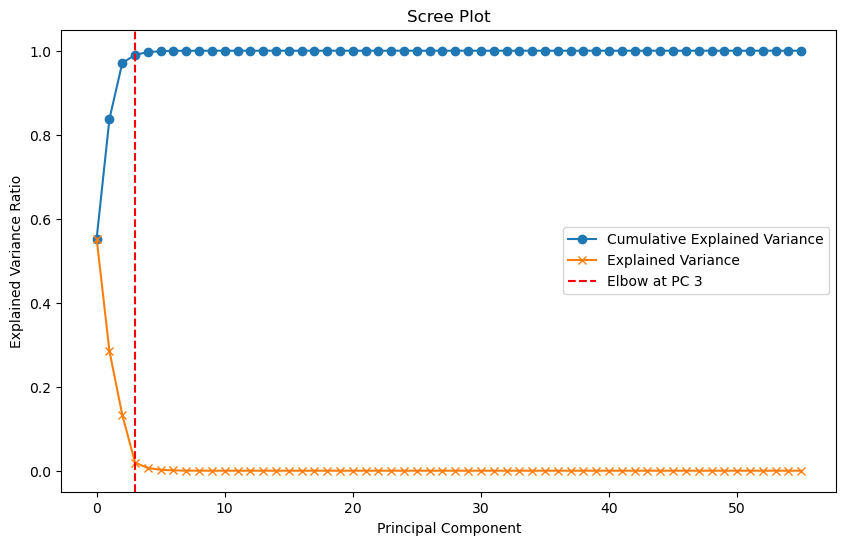

In [185]:
from sklearn.decomposition import PCA
pca = PCA().fit(Loan_Default.drop(columns=['SK_ID_BUREAU','SK_ID_CURR','TARGET']))
EVR=pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_evr = np.cumsum(EVR)

# Define the elbow point: find the number of components to retain 95% variance
elbow = np.argmax(cumulative_evr >= 0.95) + 1
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(EVR), marker='o', label='Cumulative Explained Variance')
plt.plot(EVR, marker='x', label='Explained Variance')
plt.axvline(x=elbow, color='r', linestyle='--', label=f'Elbow at PC {elbow}')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.legend(loc='best')
plt.show()

In [188]:
pca = PCA(n_components=3)
pca.fit(Loan_Default.drop(columns=['SK_ID_BUREAU','SK_ID_CURR','TARGET']))

PCA(n_components=3)

In [189]:
explained_variance = pca.explained_variance_ratio_

In [190]:
cumulative_explained_variance = explained_variance.cumsum()

In [191]:
# Output results
print("Explained Variance Ratio for each component:", explained_variance)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio for each component: [0.55263242 0.28484095 0.13319187]
Cumulative Explained Variance: [0.55263242 0.83747337 0.97066524]


In [ ]:
# now we are going to train the models and evaluate it

In [192]:
# 1. Prepare the data (drop unnecessary columns)
X = Loan_Default.drop(columns=['SK_ID_BUREAU', 'SK_ID_CURR', 'TARGET'])
y = Loan_Default['TARGET']

In [193]:
# 2. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# 3. Apply PCA to the training data and then transform the test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [195]:
# 4. Balance the training data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

In [196]:
# Train the RandomForest model on the resampled (balanced) data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [197]:
# Make predictions on the test set
y_pred = model.predict(X_test_pca)

In [198]:
# Evaluate the model's performance
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91    278097
           1       0.22      0.42      0.29     23772

    accuracy                           0.84    301869
   macro avg       0.58      0.65      0.60    301869
weighted avg       0.89      0.84      0.86    301869

ROC AUC Score: 0.65


In [199]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=42)
model1.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [200]:
#  Make predictions on the test set
y_pred1 = model1.predict(X_test_pca)

In [201]:
#  Evaluate the Logistic Regression model's performance
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:")
print(classification_report(y_test, y_pred1))

roc_auc = roc_auc_score(y_test, y_pred1)
print(f"ROC AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79    278097
           1       0.09      0.37      0.15     23772

    accuracy                           0.66    301869
   macro avg       0.51      0.53      0.47    301869
weighted avg       0.86      0.66      0.74    301869

ROC AUC Score: 0.53


In [ ]:
from sklearn.svm import SVC
model2 = SVC(kernal='linear',random_state=42)
model2.fit(X_train_resampled, y_train_resampled)

In [ ]:
#  Make predictions on the test set
y_pred2 = model2.predict(X_test_pca)

In [ ]:
#  Evaluate the SVM model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred2))

roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc:.2f}")

Interpretation: and challenges
Random forest model
High Accuracy (0.84):
The model correctly predicts the target for 84% of the instances. 

Precision and Recall for Class 1 (Default):
Precision (0.22): Among the instances predicted as defaults, only 22% are actual defaults. This indicates a high number of false positives.
Recall (0.42): The model identifies 42% of the actual defaults. While better than random guessing, this is still quite low, 
suggesting that many defaults are missed (false negatives).

F1-Score for Class 1 (0.29):
The F1-score is the harmonic mean of precision and recall, indicating a balance between the two. A score of 0.29 shows that the model 
struggles to perform well on the minority class (defaults).

ROC AUC Score (0.65):
The ROC AUC score of 0.65 suggests that the model has some ability to distinguish between the two classes,
but it's not particularly strong. A value of 0.5 indicates random guessing, so 0.65 is better, but not ideal.

However,when comparing  Randomforest modelm is better than Logistic Regression model

So,we had a challenge to improve our performance,in order to do that we use hyperparameter tuning,However,the computing power is our main concern when it applied,it takes too much time to execute.


#### Report on Challenges Faced:

1. **Data Imbalance**:
   - The target variable was imbalanced, with more non-defaulters than defaulters.
   - **Solution**: Used techniques like SMOTE to balance the dataset.

2. **Missing Values**:
   - Many features had missing values.
   - **Solution**: Imputed missing values using median for numerical features and mode for categorical features.

3. **Feature Selection**:
   - High-dimensional data made feature selection challenging.
   - **Solution**: Used feature importance from models like Random Forest and XGBoost to select the most relevant features.

4. **Data Merging**:
   - Merging multiple datasets based on different keys was complex.
   - **Solution**: Carefully merged datasets using common keys and ensured data consistency.

5. **Hyperparameter Tuning**:
   - Tuning model parameters for optimal performance was time-consuming.
   - **Solution**: Used grid search and cross-validation techniques for efficient tuning.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10,],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
   }

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=5, cv=3, verbose=2, random_state=42,
                                   n_jobs=-1, scoring='roc_auc')

In [ ]:
# Fit the random search model
random_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Best parameters from the random search
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
# Train the best model
best_model = random_search.best_estimator_

In [ ]:
# Predict and evaluate
y_pred = best_model.predict(X_test_pca)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")